In [1]:
import sys
sys.path.append('/home/abir/Documents/e-optha_processed')

In [2]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
import os
import torchvision.transforms as T
import albumentations as A

/home/abir/miniconda3/envs/jason_en/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/abir/miniconda3/envs/jason_en/lib/python3.9/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
# infer_dir=os.listdir('/home/abir/Documents/e-optha_processed/unseem_fundus')
# for imgs in infer_dir:
#     print(imgs)
train_df = pd.read_csv('/home/abir/Documents/PROJECTS/seg_folder/test_idrid_csv.csv',encoding='UTF-16')      
train_df=train_df[['Images','Haemorrhages','Hard_Exudates','Microaneurysms','Soft_Exudates']]
# train_df = train_df.fillna('').astype(str)
train_df=train_df[train_df.Soft_Exudates.notnull()]
# asd=len(df);print(asd)
# df.drop(df.loc[df['Soft_Exudates']!='NA'].index, inplace=True)

train_df.head(50)


,Images,Haemorrhages,Hard_Exudates,Microaneurysms,Soft_Exudates
0,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
1,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
4,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
5,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
6,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
9,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
12,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
13,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
15,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...
16,/home/abir/Documents/PROJECTS/seg_folder/Testi...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...,/home/abir/Documents/PROJECTS/seg_folder/test_...


In [4]:
def select_img(idx):
    index=idx
    tans=T.Resize([320,320])
    row = train_df.iloc[index]
    image_path=row.Images
    mask_HA_path = row.Haemorrhages	
    # mask_HA=cv2.imread(mask_HA_path,cv2.IMREAD_GRAYSCALE);mask_HA=cv2.resize(mask_HA,(320,320))
    mask_HA=Image.open(mask_HA_path);mask_HA=tans(mask_HA)
    mask_HE_path = row.Hard_Exudates
    mask_HE=Image.open(mask_HE_path);mask_HE=tans(mask_HE)
    mask_MI_path = row.Microaneurysms
    mask_MI=Image.open(mask_MI_path);mask_MI=tans(mask_MI)
    mask_SE_path = row.Soft_Exudates
    mask_SE=Image.open(mask_SE_path);mask_SE=tans(mask_SE)

    infer_img=Image.open(image_path)
    plot_img=infer_img
    # tans=A.Compose([A.Resize(IMAGE_SIZE, IMAGE_SIZE,always_apply=True,)])
    infer_img=tans(infer_img)
    infer_img=np.transpose(infer_img,(2,0,1))
    infer_img=torch.Tensor(infer_img)/255.0
    # infer_MA=infer_img
    # print(infer_img.shape)
    
    return infer_img, plot_img, mask_HA, mask_HE, mask_MI, mask_SE



In [5]:
import torch.nn as nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss

In [6]:
class DRpredModel(nn.Module):
  def __init__(self):
    super(DRpredModel, self).__init__()
    self.arc = smp.Unet(encoder_name='timm-efficientnet-b0',
                        encoder_weights='imagenet',
                        in_channels=3,
                        classes=1,
                        activation=None,
                        )
  def forward(self, images, masks=None):
    logits = self.arc(images)
    if masks!=None:
      loss1=DiceLoss(mode='binary')(logits, masks)
      loss2= nn.BCEWithLogitsLoss()(logits, masks)
      return logits, loss1+loss2

    return logits


In [7]:
DEVICE=torch.device('cuda')

In [8]:
def show_image(image,mask,pred_image = None):
    # counter=1
    if pred_image == None:

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')

        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')

    elif pred_image != None :

        f, ( ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))  #

        ax1.set_title('IMAGE')
        ax1.imshow(image,cmap = 'gray')   #.permute(1,2,0).squeeze()
        ax1.axis('off')
        # ax.savefig('IDRiD_oimage'+str(counter),format='png',dpi=1200,bbox_inches='tight', pad_inches=0)

        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask,cmap = 'gray')    #.permute(1,2,0).squeeze()
        ax2.axis('off')
        # ax2.savefig('IDRiD_omask'+str(counter),format='png',dpi=1200,bbox_inches='tight', pad_inches=0)

        ax3.set_title('MODEL OUTPUT')
        ax3.imshow(pred_image.permute(1,2,0).squeeze(),cmap = 'gray')
        ax3.axis('off')
        # plt.savefig('IDRiD_pred_mask_val01',format='png',dpi=1200,bbox_inches='tight', pad_inches=0)

        # counter=+1

In [9]:
def precision_score_(mask, pred_mask):
    
    intersect = torch.sum(pred_mask*mask)
    total_pixel_pred = torch.sum(pred_mask)
    precision = torch.mean(intersect/total_pixel_pred)
    # print(precision)
    return round(precision.item(), 3)

def recall_score_(mask, pred_mask):
    intersect = torch.sum(pred_mask*mask)
    total_pixel_truth = torch.sum(mask)
    if total_pixel_truth == 0:
        return 0.0
    recall = torch.mean(intersect/total_pixel_truth)
    return round(recall.item(), 3)

def accuracy(mask, pred_mask):
    intersect = np.sum(pred_mask*mask)
    union = np.sum(pred_mask) + np.sum(mask) - intersect
    xor = np.sum(mask==pred_mask)
    acc = np.mean(xor/(union + xor - intersect))
    return round(acc,3)

def dice_coef(mask, pred_mask):
    intersect = np.sum(pred_mask*mask)
    total_sum = np.sum(pred_mask) + np.sum(mask)
    dice = np.mean(2*intersect/total_sum)
    return round(dice, 3) #round up to 3 decimal places

def iou_(mask, pred_mask):
    intersect = torch.sum(pred_mask*mask)
    union = torch.sum(pred_mask) + torch.sum(mask) - intersect
    if union == 0:
        return 1.0 
    iou = torch.mean(intersect/union)
    return round(iou.item(), 3)

In [10]:
INDEX=9
infer_img, plot_img, mask_HA, mask_HE, mask_MI, mask_SE = select_img(idx=INDEX)  #
# print(f'infer_img:{infer_img.shape}, plot_img:{plot_img.size}, mask_HA:{mask_HA.shape}, mask_HE{mask_HE.size}, mask_MI:{mask_MI.size}, mask_SE:{mask_SE.size}')
def mdl_inference(model,image,cls,save):
    
    if cls=='HA': mask_gt=mask_HA
    if cls=='HE': mask_gt=mask_HE
    if cls=='MI': mask_gt=mask_MI
    if cls=='SE': mask_gt=mask_SE
    # print('echo')
    model=model
    logists=model(image.unsqueeze(0))
    # print('echo')
    pred_mask= torch.sigmoid(logists)  # as we have not used sigmoid in pred function
    pred_mask= (pred_mask>0.5)*1.0
    pred_mask=pred_mask.detach().cpu().squeeze(0)
    tensor_mask=mask_gt
    tensor_mask=np.expand_dims(tensor_mask, axis=-1)                             #np.array(tensor_mask)
    # print(tensor_mask.shape)
    tensor_mask=np.transpose(tensor_mask,(2,0,1))
    # print('echo')
    tensor_mask=torch.Tensor(tensor_mask)/255.0
    # print(isinstance(tensor_mask, torch.Tensor))  # Should output True
    # print(isinstance(pred_mask, torch.Tensor))
    #IOU calculation
    IOU_score=iou_(mask=tensor_mask,pred_mask=pred_mask)

    precision=precision_score_(mask=tensor_mask,pred_mask=pred_mask)
   
    recall=recall_score_(mask=tensor_mask,pred_mask=pred_mask)
    if precision + recall == 0:
        return 0.0
    F1_score = 2 * (precision * recall) / (precision + recall)
    F1_score=round(F1_score, 3)
    # print(f'IOU:{IOU_score} F1:{F1_score}')
    # if IOU_score>F1_score:
    print(f'IOU score:{IOU_score} F1 score:{F1_score}')
    
    # if save=='T':
    #     plt.imshow(pred_mask.permute(1,2,0).squeeze(),cmap = 'gray')
    #     plt.axis('off')
    #     plt.savefig('IDRiD_pred_mask_val9_HE',format='png',dpi=600,bbox_inches='tight', pad_inches=0)


    show_image(image=plot_img, mask=mask_gt,pred_image=pred_mask) 



/tmp/ipykernel_13741/2046581592.py:21: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1716905969824/work/torch/csrc/utils/tensor_numpy.cpp:206.)
  infer_img=torch.Tensor(infer_img)/255.0


In [11]:
def pred_image(infer_image):

    infer_image=infer_image.to(DEVICE)
    hem_model=DRpredModel()
    hem_model=hem_model.to(DEVICE)
    hrex_model=DRpredModel()
    hrex_model=hrex_model.to(DEVICE)
    mic_model=DRpredModel()
    mic_model=mic_model.to(DEVICE)
    sfex_model=DRpredModel()
    sfex_model=sfex_model.to(DEVICE)
    
    hem_model.load_state_dict(torch.load('/home/abir/Documents/PROJECTS/seg_folder/saved models/best_model_hema_adam.pt'))
    mdl_inference(model=hem_model,image=infer_image,cls='HA',save='F')

    # hrex_model.load_state_dict(torch.load('/home/abir/Documents/PROJECTS/seg_folder/saved models/best_model_Hd_Exu_adam.pt'))
    hrex_model.load_state_dict(torch.load('/home/abir/Documents/PROJECTS/e-optha_processed/EX/best_model.pt'))
    mdl_inference(model=hrex_model,image=infer_image,cls='HE',save='F')

    mic_model.load_state_dict(torch.load('/home/abir/Documents/PROJECTS/seg_folder/saved models/best_model_micro_adam.pt'))
    # mic_model.load_state_dict(torch.load('/home/abir/Documents/PROJECTS/seg_folder/UNet_model_micro_adam50.pt'))   #unet
    # mic_model.load_state_dict(torch.load('/home/abir/Documents/e-optha_processed/MA/best_model.pt'))
    mdl_inference(model=mic_model,image=infer_image,cls='MI',save='F')

    sfex_model.load_state_dict(torch.load('/home/abir/Documents/PROJECTS/seg_folder/saved models/best_model_SE_adam.pt'))
    mdl_inference(model=sfex_model,image=infer_image,cls='SE',save='F')

    
    

IOU score:0.002 F1 score:0.004
IOU score:0.003 F1 score:0.006


RuntimeError: Error(s) in loading state_dict for DRpredModel:
	Missing key(s) in state_dict: "arc.encoder.conv_stem.weight", "arc.encoder.bn1.weight", "arc.encoder.bn1.bias", "arc.encoder.bn1.running_mean", "arc.encoder.bn1.running_var", "arc.encoder.blocks.0.0.conv_dw.weight", "arc.encoder.blocks.0.0.bn1.weight", "arc.encoder.blocks.0.0.bn1.bias", "arc.encoder.blocks.0.0.bn1.running_mean", "arc.encoder.blocks.0.0.bn1.running_var", "arc.encoder.blocks.0.0.se.conv_reduce.weight", "arc.encoder.blocks.0.0.se.conv_reduce.bias", "arc.encoder.blocks.0.0.se.conv_expand.weight", "arc.encoder.blocks.0.0.se.conv_expand.bias", "arc.encoder.blocks.0.0.conv_pw.weight", "arc.encoder.blocks.0.0.bn2.weight", "arc.encoder.blocks.0.0.bn2.bias", "arc.encoder.blocks.0.0.bn2.running_mean", "arc.encoder.blocks.0.0.bn2.running_var", "arc.encoder.blocks.1.0.conv_pw.weight", "arc.encoder.blocks.1.0.bn1.weight", "arc.encoder.blocks.1.0.bn1.bias", "arc.encoder.blocks.1.0.bn1.running_mean", "arc.encoder.blocks.1.0.bn1.running_var", "arc.encoder.blocks.1.0.conv_dw.weight", "arc.encoder.blocks.1.0.bn2.weight", "arc.encoder.blocks.1.0.bn2.bias", "arc.encoder.blocks.1.0.bn2.running_mean", "arc.encoder.blocks.1.0.bn2.running_var", "arc.encoder.blocks.1.0.se.conv_reduce.weight", "arc.encoder.blocks.1.0.se.conv_reduce.bias", "arc.encoder.blocks.1.0.se.conv_expand.weight", "arc.encoder.blocks.1.0.se.conv_expand.bias", "arc.encoder.blocks.1.0.conv_pwl.weight", "arc.encoder.blocks.1.0.bn3.weight", "arc.encoder.blocks.1.0.bn3.bias", "arc.encoder.blocks.1.0.bn3.running_mean", "arc.encoder.blocks.1.0.bn3.running_var", "arc.encoder.blocks.1.1.conv_pw.weight", "arc.encoder.blocks.1.1.bn1.weight", "arc.encoder.blocks.1.1.bn1.bias", "arc.encoder.blocks.1.1.bn1.running_mean", "arc.encoder.blocks.1.1.bn1.running_var", "arc.encoder.blocks.1.1.conv_dw.weight", "arc.encoder.blocks.1.1.bn2.weight", "arc.encoder.blocks.1.1.bn2.bias", "arc.encoder.blocks.1.1.bn2.running_mean", "arc.encoder.blocks.1.1.bn2.running_var", "arc.encoder.blocks.1.1.se.conv_reduce.weight", "arc.encoder.blocks.1.1.se.conv_reduce.bias", "arc.encoder.blocks.1.1.se.conv_expand.weight", "arc.encoder.blocks.1.1.se.conv_expand.bias", "arc.encoder.blocks.1.1.conv_pwl.weight", "arc.encoder.blocks.1.1.bn3.weight", "arc.encoder.blocks.1.1.bn3.bias", "arc.encoder.blocks.1.1.bn3.running_mean", "arc.encoder.blocks.1.1.bn3.running_var", "arc.encoder.blocks.2.0.conv_pw.weight", "arc.encoder.blocks.2.0.bn1.weight", "arc.encoder.blocks.2.0.bn1.bias", "arc.encoder.blocks.2.0.bn1.running_mean", "arc.encoder.blocks.2.0.bn1.running_var", "arc.encoder.blocks.2.0.conv_dw.weight", "arc.encoder.blocks.2.0.bn2.weight", "arc.encoder.blocks.2.0.bn2.bias", "arc.encoder.blocks.2.0.bn2.running_mean", "arc.encoder.blocks.2.0.bn2.running_var", "arc.encoder.blocks.2.0.se.conv_reduce.weight", "arc.encoder.blocks.2.0.se.conv_reduce.bias", "arc.encoder.blocks.2.0.se.conv_expand.weight", "arc.encoder.blocks.2.0.se.conv_expand.bias", "arc.encoder.blocks.2.0.conv_pwl.weight", "arc.encoder.blocks.2.0.bn3.weight", "arc.encoder.blocks.2.0.bn3.bias", "arc.encoder.blocks.2.0.bn3.running_mean", "arc.encoder.blocks.2.0.bn3.running_var", "arc.encoder.blocks.2.1.conv_pw.weight", "arc.encoder.blocks.2.1.bn1.weight", "arc.encoder.blocks.2.1.bn1.bias", "arc.encoder.blocks.2.1.bn1.running_mean", "arc.encoder.blocks.2.1.bn1.running_var", "arc.encoder.blocks.2.1.conv_dw.weight", "arc.encoder.blocks.2.1.bn2.weight", "arc.encoder.blocks.2.1.bn2.bias", "arc.encoder.blocks.2.1.bn2.running_mean", "arc.encoder.blocks.2.1.bn2.running_var", "arc.encoder.blocks.2.1.se.conv_reduce.weight", "arc.encoder.blocks.2.1.se.conv_reduce.bias", "arc.encoder.blocks.2.1.se.conv_expand.weight", "arc.encoder.blocks.2.1.se.conv_expand.bias", "arc.encoder.blocks.2.1.conv_pwl.weight", "arc.encoder.blocks.2.1.bn3.weight", "arc.encoder.blocks.2.1.bn3.bias", "arc.encoder.blocks.2.1.bn3.running_mean", "arc.encoder.blocks.2.1.bn3.running_var", "arc.encoder.blocks.3.0.conv_pw.weight", "arc.encoder.blocks.3.0.bn1.weight", "arc.encoder.blocks.3.0.bn1.bias", "arc.encoder.blocks.3.0.bn1.running_mean", "arc.encoder.blocks.3.0.bn1.running_var", "arc.encoder.blocks.3.0.conv_dw.weight", "arc.encoder.blocks.3.0.bn2.weight", "arc.encoder.blocks.3.0.bn2.bias", "arc.encoder.blocks.3.0.bn2.running_mean", "arc.encoder.blocks.3.0.bn2.running_var", "arc.encoder.blocks.3.0.se.conv_reduce.weight", "arc.encoder.blocks.3.0.se.conv_reduce.bias", "arc.encoder.blocks.3.0.se.conv_expand.weight", "arc.encoder.blocks.3.0.se.conv_expand.bias", "arc.encoder.blocks.3.0.conv_pwl.weight", "arc.encoder.blocks.3.0.bn3.weight", "arc.encoder.blocks.3.0.bn3.bias", "arc.encoder.blocks.3.0.bn3.running_mean", "arc.encoder.blocks.3.0.bn3.running_var", "arc.encoder.blocks.3.1.conv_pw.weight", "arc.encoder.blocks.3.1.bn1.weight", "arc.encoder.blocks.3.1.bn1.bias", "arc.encoder.blocks.3.1.bn1.running_mean", "arc.encoder.blocks.3.1.bn1.running_var", "arc.encoder.blocks.3.1.conv_dw.weight", "arc.encoder.blocks.3.1.bn2.weight", "arc.encoder.blocks.3.1.bn2.bias", "arc.encoder.blocks.3.1.bn2.running_mean", "arc.encoder.blocks.3.1.bn2.running_var", "arc.encoder.blocks.3.1.se.conv_reduce.weight", "arc.encoder.blocks.3.1.se.conv_reduce.bias", "arc.encoder.blocks.3.1.se.conv_expand.weight", "arc.encoder.blocks.3.1.se.conv_expand.bias", "arc.encoder.blocks.3.1.conv_pwl.weight", "arc.encoder.blocks.3.1.bn3.weight", "arc.encoder.blocks.3.1.bn3.bias", "arc.encoder.blocks.3.1.bn3.running_mean", "arc.encoder.blocks.3.1.bn3.running_var", "arc.encoder.blocks.3.2.conv_pw.weight", "arc.encoder.blocks.3.2.bn1.weight", "arc.encoder.blocks.3.2.bn1.bias", "arc.encoder.blocks.3.2.bn1.running_mean", "arc.encoder.blocks.3.2.bn1.running_var", "arc.encoder.blocks.3.2.conv_dw.weight", "arc.encoder.blocks.3.2.bn2.weight", "arc.encoder.blocks.3.2.bn2.bias", "arc.encoder.blocks.3.2.bn2.running_mean", "arc.encoder.blocks.3.2.bn2.running_var", "arc.encoder.blocks.3.2.se.conv_reduce.weight", "arc.encoder.blocks.3.2.se.conv_reduce.bias", "arc.encoder.blocks.3.2.se.conv_expand.weight", "arc.encoder.blocks.3.2.se.conv_expand.bias", "arc.encoder.blocks.3.2.conv_pwl.weight", "arc.encoder.blocks.3.2.bn3.weight", "arc.encoder.blocks.3.2.bn3.bias", "arc.encoder.blocks.3.2.bn3.running_mean", "arc.encoder.blocks.3.2.bn3.running_var", "arc.encoder.blocks.4.0.conv_pw.weight", "arc.encoder.blocks.4.0.bn1.weight", "arc.encoder.blocks.4.0.bn1.bias", "arc.encoder.blocks.4.0.bn1.running_mean", "arc.encoder.blocks.4.0.bn1.running_var", "arc.encoder.blocks.4.0.conv_dw.weight", "arc.encoder.blocks.4.0.bn2.weight", "arc.encoder.blocks.4.0.bn2.bias", "arc.encoder.blocks.4.0.bn2.running_mean", "arc.encoder.blocks.4.0.bn2.running_var", "arc.encoder.blocks.4.0.se.conv_reduce.weight", "arc.encoder.blocks.4.0.se.conv_reduce.bias", "arc.encoder.blocks.4.0.se.conv_expand.weight", "arc.encoder.blocks.4.0.se.conv_expand.bias", "arc.encoder.blocks.4.0.conv_pwl.weight", "arc.encoder.blocks.4.0.bn3.weight", "arc.encoder.blocks.4.0.bn3.bias", "arc.encoder.blocks.4.0.bn3.running_mean", "arc.encoder.blocks.4.0.bn3.running_var", "arc.encoder.blocks.4.1.conv_pw.weight", "arc.encoder.blocks.4.1.bn1.weight", "arc.encoder.blocks.4.1.bn1.bias", "arc.encoder.blocks.4.1.bn1.running_mean", "arc.encoder.blocks.4.1.bn1.running_var", "arc.encoder.blocks.4.1.conv_dw.weight", "arc.encoder.blocks.4.1.bn2.weight", "arc.encoder.blocks.4.1.bn2.bias", "arc.encoder.blocks.4.1.bn2.running_mean", "arc.encoder.blocks.4.1.bn2.running_var", "arc.encoder.blocks.4.1.se.conv_reduce.weight", "arc.encoder.blocks.4.1.se.conv_reduce.bias", "arc.encoder.blocks.4.1.se.conv_expand.weight", "arc.encoder.blocks.4.1.se.conv_expand.bias", "arc.encoder.blocks.4.1.conv_pwl.weight", "arc.encoder.blocks.4.1.bn3.weight", "arc.encoder.blocks.4.1.bn3.bias", "arc.encoder.blocks.4.1.bn3.running_mean", "arc.encoder.blocks.4.1.bn3.running_var", "arc.encoder.blocks.4.2.conv_pw.weight", "arc.encoder.blocks.4.2.bn1.weight", "arc.encoder.blocks.4.2.bn1.bias", "arc.encoder.blocks.4.2.bn1.running_mean", "arc.encoder.blocks.4.2.bn1.running_var", "arc.encoder.blocks.4.2.conv_dw.weight", "arc.encoder.blocks.4.2.bn2.weight", "arc.encoder.blocks.4.2.bn2.bias", "arc.encoder.blocks.4.2.bn2.running_mean", "arc.encoder.blocks.4.2.bn2.running_var", "arc.encoder.blocks.4.2.se.conv_reduce.weight", "arc.encoder.blocks.4.2.se.conv_reduce.bias", "arc.encoder.blocks.4.2.se.conv_expand.weight", "arc.encoder.blocks.4.2.se.conv_expand.bias", "arc.encoder.blocks.4.2.conv_pwl.weight", "arc.encoder.blocks.4.2.bn3.weight", "arc.encoder.blocks.4.2.bn3.bias", "arc.encoder.blocks.4.2.bn3.running_mean", "arc.encoder.blocks.4.2.bn3.running_var", "arc.encoder.blocks.5.0.conv_pw.weight", "arc.encoder.blocks.5.0.bn1.weight", "arc.encoder.blocks.5.0.bn1.bias", "arc.encoder.blocks.5.0.bn1.running_mean", "arc.encoder.blocks.5.0.bn1.running_var", "arc.encoder.blocks.5.0.conv_dw.weight", "arc.encoder.blocks.5.0.bn2.weight", "arc.encoder.blocks.5.0.bn2.bias", "arc.encoder.blocks.5.0.bn2.running_mean", "arc.encoder.blocks.5.0.bn2.running_var", "arc.encoder.blocks.5.0.se.conv_reduce.weight", "arc.encoder.blocks.5.0.se.conv_reduce.bias", "arc.encoder.blocks.5.0.se.conv_expand.weight", "arc.encoder.blocks.5.0.se.conv_expand.bias", "arc.encoder.blocks.5.0.conv_pwl.weight", "arc.encoder.blocks.5.0.bn3.weight", "arc.encoder.blocks.5.0.bn3.bias", "arc.encoder.blocks.5.0.bn3.running_mean", "arc.encoder.blocks.5.0.bn3.running_var", "arc.encoder.blocks.5.1.conv_pw.weight", "arc.encoder.blocks.5.1.bn1.weight", "arc.encoder.blocks.5.1.bn1.bias", "arc.encoder.blocks.5.1.bn1.running_mean", "arc.encoder.blocks.5.1.bn1.running_var", "arc.encoder.blocks.5.1.conv_dw.weight", "arc.encoder.blocks.5.1.bn2.weight", "arc.encoder.blocks.5.1.bn2.bias", "arc.encoder.blocks.5.1.bn2.running_mean", "arc.encoder.blocks.5.1.bn2.running_var", "arc.encoder.blocks.5.1.se.conv_reduce.weight", "arc.encoder.blocks.5.1.se.conv_reduce.bias", "arc.encoder.blocks.5.1.se.conv_expand.weight", "arc.encoder.blocks.5.1.se.conv_expand.bias", "arc.encoder.blocks.5.1.conv_pwl.weight", "arc.encoder.blocks.5.1.bn3.weight", "arc.encoder.blocks.5.1.bn3.bias", "arc.encoder.blocks.5.1.bn3.running_mean", "arc.encoder.blocks.5.1.bn3.running_var", "arc.encoder.blocks.5.2.conv_pw.weight", "arc.encoder.blocks.5.2.bn1.weight", "arc.encoder.blocks.5.2.bn1.bias", "arc.encoder.blocks.5.2.bn1.running_mean", "arc.encoder.blocks.5.2.bn1.running_var", "arc.encoder.blocks.5.2.conv_dw.weight", "arc.encoder.blocks.5.2.bn2.weight", "arc.encoder.blocks.5.2.bn2.bias", "arc.encoder.blocks.5.2.bn2.running_mean", "arc.encoder.blocks.5.2.bn2.running_var", "arc.encoder.blocks.5.2.se.conv_reduce.weight", "arc.encoder.blocks.5.2.se.conv_reduce.bias", "arc.encoder.blocks.5.2.se.conv_expand.weight", "arc.encoder.blocks.5.2.se.conv_expand.bias", "arc.encoder.blocks.5.2.conv_pwl.weight", "arc.encoder.blocks.5.2.bn3.weight", "arc.encoder.blocks.5.2.bn3.bias", "arc.encoder.blocks.5.2.bn3.running_mean", "arc.encoder.blocks.5.2.bn3.running_var", "arc.encoder.blocks.5.3.conv_pw.weight", "arc.encoder.blocks.5.3.bn1.weight", "arc.encoder.blocks.5.3.bn1.bias", "arc.encoder.blocks.5.3.bn1.running_mean", "arc.encoder.blocks.5.3.bn1.running_var", "arc.encoder.blocks.5.3.conv_dw.weight", "arc.encoder.blocks.5.3.bn2.weight", "arc.encoder.blocks.5.3.bn2.bias", "arc.encoder.blocks.5.3.bn2.running_mean", "arc.encoder.blocks.5.3.bn2.running_var", "arc.encoder.blocks.5.3.se.conv_reduce.weight", "arc.encoder.blocks.5.3.se.conv_reduce.bias", "arc.encoder.blocks.5.3.se.conv_expand.weight", "arc.encoder.blocks.5.3.se.conv_expand.bias", "arc.encoder.blocks.5.3.conv_pwl.weight", "arc.encoder.blocks.5.3.bn3.weight", "arc.encoder.blocks.5.3.bn3.bias", "arc.encoder.blocks.5.3.bn3.running_mean", "arc.encoder.blocks.5.3.bn3.running_var", "arc.encoder.blocks.6.0.conv_pw.weight", "arc.encoder.blocks.6.0.bn1.weight", "arc.encoder.blocks.6.0.bn1.bias", "arc.encoder.blocks.6.0.bn1.running_mean", "arc.encoder.blocks.6.0.bn1.running_var", "arc.encoder.blocks.6.0.conv_dw.weight", "arc.encoder.blocks.6.0.bn2.weight", "arc.encoder.blocks.6.0.bn2.bias", "arc.encoder.blocks.6.0.bn2.running_mean", "arc.encoder.blocks.6.0.bn2.running_var", "arc.encoder.blocks.6.0.se.conv_reduce.weight", "arc.encoder.blocks.6.0.se.conv_reduce.bias", "arc.encoder.blocks.6.0.se.conv_expand.weight", "arc.encoder.blocks.6.0.se.conv_expand.bias", "arc.encoder.blocks.6.0.conv_pwl.weight", "arc.encoder.blocks.6.0.bn3.weight", "arc.encoder.blocks.6.0.bn3.bias", "arc.encoder.blocks.6.0.bn3.running_mean", "arc.encoder.blocks.6.0.bn3.running_var", "arc.encoder.conv_head.weight", "arc.encoder.bn2.weight", "arc.encoder.bn2.bias", "arc.encoder.bn2.running_mean", "arc.encoder.bn2.running_var", "arc.decoder.blocks.0.conv1.0.weight", "arc.decoder.blocks.0.conv1.1.weight", "arc.decoder.blocks.0.conv1.1.bias", "arc.decoder.blocks.0.conv1.1.running_mean", "arc.decoder.blocks.0.conv1.1.running_var", "arc.decoder.blocks.0.conv2.0.weight", "arc.decoder.blocks.0.conv2.1.weight", "arc.decoder.blocks.0.conv2.1.bias", "arc.decoder.blocks.0.conv2.1.running_mean", "arc.decoder.blocks.0.conv2.1.running_var", "arc.decoder.blocks.1.conv1.0.weight", "arc.decoder.blocks.1.conv1.1.weight", "arc.decoder.blocks.1.conv1.1.bias", "arc.decoder.blocks.1.conv1.1.running_mean", "arc.decoder.blocks.1.conv1.1.running_var", "arc.decoder.blocks.1.conv2.0.weight", "arc.decoder.blocks.1.conv2.1.weight", "arc.decoder.blocks.1.conv2.1.bias", "arc.decoder.blocks.1.conv2.1.running_mean", "arc.decoder.blocks.1.conv2.1.running_var", "arc.decoder.blocks.2.conv1.0.weight", "arc.decoder.blocks.2.conv1.1.weight", "arc.decoder.blocks.2.conv1.1.bias", "arc.decoder.blocks.2.conv1.1.running_mean", "arc.decoder.blocks.2.conv1.1.running_var", "arc.decoder.blocks.2.conv2.0.weight", "arc.decoder.blocks.2.conv2.1.weight", "arc.decoder.blocks.2.conv2.1.bias", "arc.decoder.blocks.2.conv2.1.running_mean", "arc.decoder.blocks.2.conv2.1.running_var", "arc.decoder.blocks.3.conv1.0.weight", "arc.decoder.blocks.3.conv1.1.weight", "arc.decoder.blocks.3.conv1.1.bias", "arc.decoder.blocks.3.conv1.1.running_mean", "arc.decoder.blocks.3.conv1.1.running_var", "arc.decoder.blocks.3.conv2.0.weight", "arc.decoder.blocks.3.conv2.1.weight", "arc.decoder.blocks.3.conv2.1.bias", "arc.decoder.blocks.3.conv2.1.running_mean", "arc.decoder.blocks.3.conv2.1.running_var", "arc.decoder.blocks.4.conv1.0.weight", "arc.decoder.blocks.4.conv1.1.weight", "arc.decoder.blocks.4.conv1.1.bias", "arc.decoder.blocks.4.conv1.1.running_mean", "arc.decoder.blocks.4.conv1.1.running_var", "arc.decoder.blocks.4.conv2.0.weight", "arc.decoder.blocks.4.conv2.1.weight", "arc.decoder.blocks.4.conv2.1.bias", "arc.decoder.blocks.4.conv2.1.running_mean", "arc.decoder.blocks.4.conv2.1.running_var", "arc.segmentation_head.0.weight", "arc.segmentation_head.0.bias". 
	Unexpected key(s) in state_dict: "e1.conv.conv1.weight", "e1.conv.conv1.bias", "e1.conv.bn1.weight", "e1.conv.bn1.bias", "e1.conv.bn1.running_mean", "e1.conv.bn1.running_var", "e1.conv.bn1.num_batches_tracked", "e1.conv.conv2.weight", "e1.conv.conv2.bias", "e1.conv.bn2.weight", "e1.conv.bn2.bias", "e1.conv.bn2.running_mean", "e1.conv.bn2.running_var", "e1.conv.bn2.num_batches_tracked", "e2.conv.conv1.weight", "e2.conv.conv1.bias", "e2.conv.bn1.weight", "e2.conv.bn1.bias", "e2.conv.bn1.running_mean", "e2.conv.bn1.running_var", "e2.conv.bn1.num_batches_tracked", "e2.conv.conv2.weight", "e2.conv.conv2.bias", "e2.conv.bn2.weight", "e2.conv.bn2.bias", "e2.conv.bn2.running_mean", "e2.conv.bn2.running_var", "e2.conv.bn2.num_batches_tracked", "e3.conv.conv1.weight", "e3.conv.conv1.bias", "e3.conv.bn1.weight", "e3.conv.bn1.bias", "e3.conv.bn1.running_mean", "e3.conv.bn1.running_var", "e3.conv.bn1.num_batches_tracked", "e3.conv.conv2.weight", "e3.conv.conv2.bias", "e3.conv.bn2.weight", "e3.conv.bn2.bias", "e3.conv.bn2.running_mean", "e3.conv.bn2.running_var", "e3.conv.bn2.num_batches_tracked", "e4.conv.conv1.weight", "e4.conv.conv1.bias", "e4.conv.bn1.weight", "e4.conv.bn1.bias", "e4.conv.bn1.running_mean", "e4.conv.bn1.running_var", "e4.conv.bn1.num_batches_tracked", "e4.conv.conv2.weight", "e4.conv.conv2.bias", "e4.conv.bn2.weight", "e4.conv.bn2.bias", "e4.conv.bn2.running_mean", "e4.conv.bn2.running_var", "e4.conv.bn2.num_batches_tracked", "b.conv1.weight", "b.conv1.bias", "b.bn1.weight", "b.bn1.bias", "b.bn1.running_mean", "b.bn1.running_var", "b.bn1.num_batches_tracked", "b.conv2.weight", "b.conv2.bias", "b.bn2.weight", "b.bn2.bias", "b.bn2.running_mean", "b.bn2.running_var", "b.bn2.num_batches_tracked", "d1.up.weight", "d1.up.bias", "d1.conv.conv1.weight", "d1.conv.conv1.bias", "d1.conv.bn1.weight", "d1.conv.bn1.bias", "d1.conv.bn1.running_mean", "d1.conv.bn1.running_var", "d1.conv.bn1.num_batches_tracked", "d1.conv.conv2.weight", "d1.conv.conv2.bias", "d1.conv.bn2.weight", "d1.conv.bn2.bias", "d1.conv.bn2.running_mean", "d1.conv.bn2.running_var", "d1.conv.bn2.num_batches_tracked", "d2.up.weight", "d2.up.bias", "d2.conv.conv1.weight", "d2.conv.conv1.bias", "d2.conv.bn1.weight", "d2.conv.bn1.bias", "d2.conv.bn1.running_mean", "d2.conv.bn1.running_var", "d2.conv.bn1.num_batches_tracked", "d2.conv.conv2.weight", "d2.conv.conv2.bias", "d2.conv.bn2.weight", "d2.conv.bn2.bias", "d2.conv.bn2.running_mean", "d2.conv.bn2.running_var", "d2.conv.bn2.num_batches_tracked", "d3.up.weight", "d3.up.bias", "d3.conv.conv1.weight", "d3.conv.conv1.bias", "d3.conv.bn1.weight", "d3.conv.bn1.bias", "d3.conv.bn1.running_mean", "d3.conv.bn1.running_var", "d3.conv.bn1.num_batches_tracked", "d3.conv.conv2.weight", "d3.conv.conv2.bias", "d3.conv.bn2.weight", "d3.conv.bn2.bias", "d3.conv.bn2.running_mean", "d3.conv.bn2.running_var", "d3.conv.bn2.num_batches_tracked", "d4.up.weight", "d4.up.bias", "d4.conv.conv1.weight", "d4.conv.conv1.bias", "d4.conv.bn1.weight", "d4.conv.bn1.bias", "d4.conv.bn1.running_mean", "d4.conv.bn1.running_var", "d4.conv.bn1.num_batches_tracked", "d4.conv.conv2.weight", "d4.conv.conv2.bias", "d4.conv.bn2.weight", "d4.conv.bn2.bias", "d4.conv.bn2.running_mean", "d4.conv.bn2.running_var", "d4.conv.bn2.num_batches_tracked", "outputs.weight", "outputs.bias". 

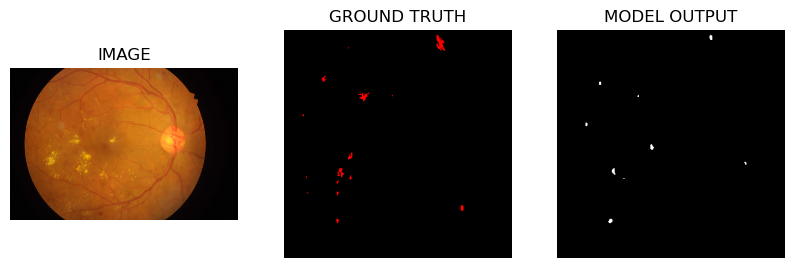

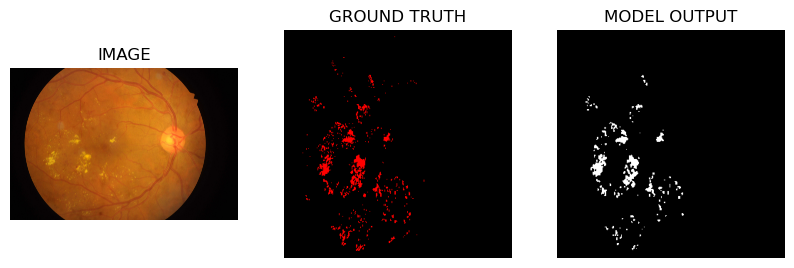

In [12]:
pred_image(infer_image=infer_img)


In [13]:
torch.cuda.empty_cache()